## Linear regression

The equation of the linear regression model is as follows:

$\hat{y} = \theta_{0} + \theta_{1} * x_{1} + \theta_{2} * x_{2} + ... + \theta_{n} * x_{n}$

* Where $\hat{y}$ is the predicted value.
* $n$ is the number of features.
* $x_{i}$ is the $i^{th}$ feature value.
* $\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_{0}$).

This whole equation can be written in a concise form as follows:

$\hat{y} = h_{\theta}(x) = \theta . x$

Where $\theta$ is the model's parameters, and x is the inputs.

We need to calculate a performance measure that will be used to train the model. This performance measure will be RMSE (Root Mean Square Error). However, we will use the MSE (Mean Square Error) during training because it is easier to compute and it will still minimize the RMSE since RMSE is the square root of MSE.

$MSE(X, h_{\theta}) = \frac{1}{m} * \sum_{i = 1}^{m}(\theta^{T} * x^{(i)} - y^{(i)})^2$

There is an equation that finds the value $\theta$ that minimizes the cost function directly. This equation is called the _Normal Equation_, and it is:

$\hat{\theta} = (X^T * X)^{-1} * X^T * y$

Where:
* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* y is the vector of target values.

The following code generates a random linear dataset:

In [25]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

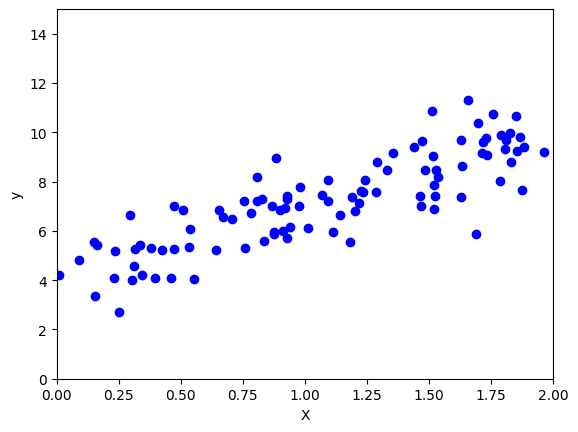

In [26]:
from matplotlib import pyplot as plt
plt.plot(X, y, 'bo')
plt.xlim((0, 2))
plt.ylim((0, 15))
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Let us now compute the ideal parameters using the normal equation discussed earlier:

In [27]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance so that there is something to be multiplied by the bias term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [28]:
theta_best

array([[4.07700968],
       [2.91509377]])

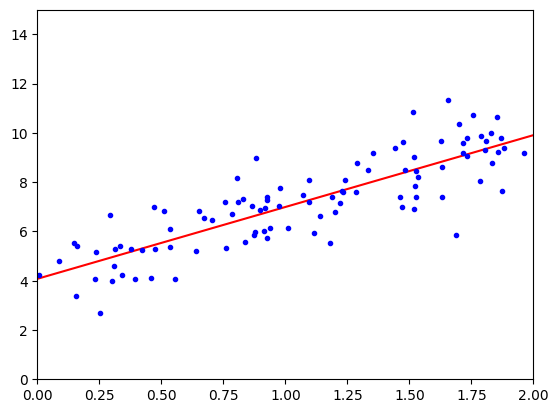

In [29]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()



Now let us see the performance of the sklearn model

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # intercept = bias, coef = other parameters

(array([4.07700968]), array([[2.91509377]]))

In [33]:
y_scikit_learn = lin_reg.predict(X_new)

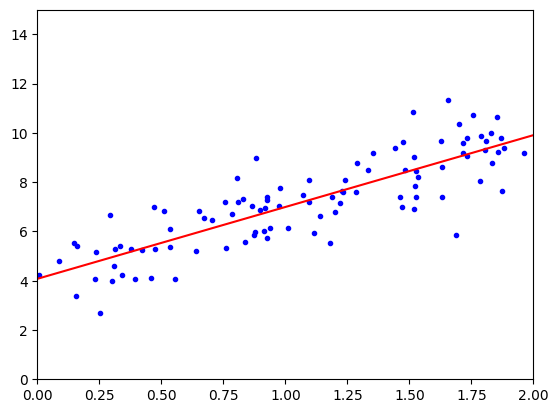

In [34]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_scikit_learn, 'r-')
plt.axis([0, 2, 0, 15])
plt.show()

The difference between the two implementations is that scikit-learn doesn't use the direct inverse of X since it might not exist. Instead, it uses the pseudoinverse, which is always defined, and it also handles edge cases quite nicely. 